# **Data Uploading**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vanpatangan/divorce-prediction")

print("Path to dataset files:", path)

100%|██████████| 257k/257k [00:00<00:00, 590kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vanpatangan/divorce-prediction/versions/1


In [2]:
#Create a data frame
import pandas as pd
import os
import numpy as np

full_csv_path = os.path.join(path, "divorce_df.csv")
df = pd.read_csv(full_csv_path)
df.head()

,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,0,0,0,8.428183,5,Love,1,0,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,0,1,0,5.297221,1,Love,1,0,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,0,0,0,5.887066,1,Arranged,1,0,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,0,0,5.263555,5,Love,1,0,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,0,0,1,5.771259,4,Love,1,0,10.000000,1


# **Data Cleaning and Processing**

In [3]:
#Analyzing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_at_marriage            5000 non-null   int64  
 1   marriage_duration_years    5000 non-null   int64  
 2   num_children               5000 non-null   int64  
 3   education_level            5000 non-null   object 
 4   employment_status          5000 non-null   object 
 5   combined_income            5000 non-null   int64  
 6   religious_compatibility    5000 non-null   object 
 7   cultural_background_match  5000 non-null   int64  
 8   communication_score        5000 non-null   float64
 9   conflict_frequency         5000 non-null   int64  
 10  conflict_resolution_style  5000 non-null   object 
 11  financial_stress_level     5000 non-null   float64
 12  mental_health_issues       5000 non-null   int64  
 13  infidelity_occurred        5000 non-null   int64

In [4]:
#Checking for missing data
df.isna().sum()

,0
age_at_marriage,0
marriage_duration_years,0
num_children,0
education_level,0
employment_status,0
combined_income,0
religious_compatibility,0
cultural_background_match,0
communication_score,0
conflict_frequency,0


In [5]:
#Checking for duplicated data
print(df.duplicated().sum(), "duplicated rows")

0 duplicated rows


**Encoding Categorical variables** (necesary for PCA and Logistice regression)

In [6]:
# --- 1) One-hot encode categorical variables ---
categorical_cols = ['education_level',
                    'employment_status',
                    'conflict_resolution_style',
                    'marriage_type',
                    'religious_compatibility']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()


,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,communication_score,conflict_frequency,financial_stress_level,mental_health_issues,infidelity_occurred,...,employment_status_Homemaker,employment_status_Part-time,employment_status_Unemployed,conflict_resolution_style_Avoidant,conflict_resolution_style_Collaborative,conflict_resolution_style_Passive,marriage_type_Love,marriage_type_Other,religious_compatibility_Not Religious,religious_compatibility_Same Religion
0,30,1,1,64001,1,5.536016,3,6.026355,0,0,...,False,False,False,False,True,False,True,False,False,False
1,27,2,2,86221,1,5.810172,3,1.000000,0,1,...,False,False,False,False,False,False,True,False,False,True
2,31,6,0,69441,0,6.088146,3,3.199275,0,0,...,False,True,False,False,True,False,False,False,False,True
3,35,3,2,69513,1,6.212046,3,4.893633,0,0,...,False,False,False,False,False,False,True,False,True,False
4,26,2,2,63986,1,4.826262,1,9.431154,0,0,...,False,False,False,False,False,True,True,False,False,False


**Scaling Variables**(necesary for PCA and Logistice regression)

In [7]:
from sklearn.preprocessing import StandardScaler

# --- 2) Split into features (X) and target (y) ---
y = df_encoded['divorced']
X = df_encoded.drop(columns=['divorced'])

# --- 3) Scale the features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Exploratory Data Analysis (EDA)**

# Age at Marriage



In [8]:
df['age_at_marriage'].describe()


,age_at_marriage
count,5000.000000
mean,27.583600
std,4.855978
min,18.000000
25%,24.000000
50%,28.000000
75%,31.000000
max,45.000000


In [9]:
df['age_at_marriage'].value_counts()


,count
age_at_marriage,
29,400
27,394
30,385
28,383
26,368
25,354
31,310
24,304
23,278


/tmp/ipython-input-2234121176.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_at_marriage',palette="mako")


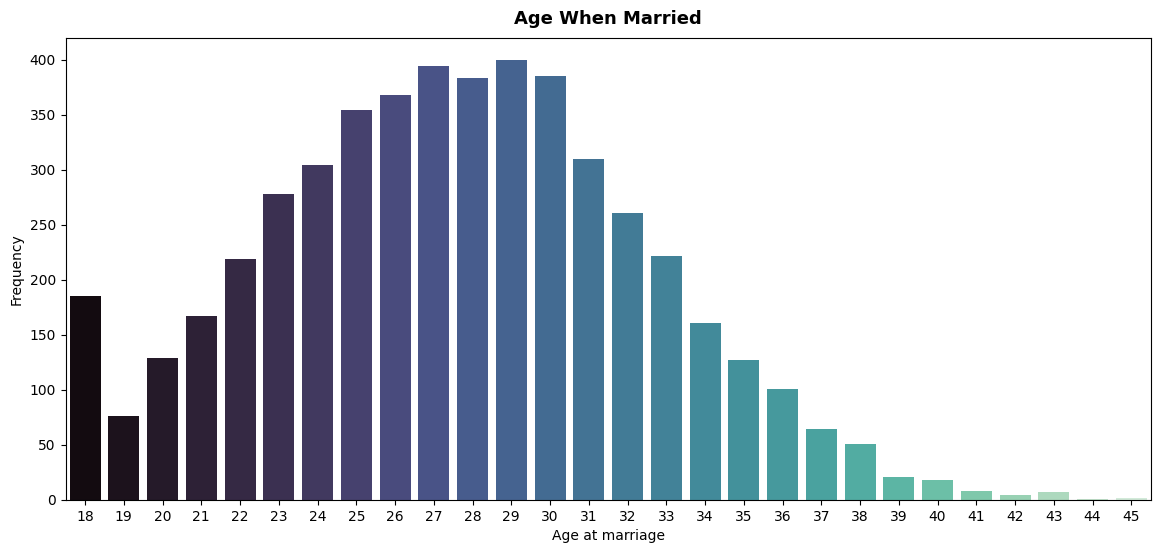

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(14,6))

sns.countplot(data=df, x='age_at_marriage',palette="mako")
plt.title("Age When Married",fontweight="black",size=13,pad=10)
plt.xlabel('Age at marriage')
plt.ylabel('Frequency')
plt.show()


# **Marriage Duration**

In [11]:
df['marriage_duration_years'].describe()


,marriage_duration_years
count,5000.000000
mean,9.171000
std,8.848266
min,1.000000
25%,2.000000
50%,6.000000
75%,13.000000
max,40.000000


In [12]:
df['marriage_duration_years'].value_counts()


,count
marriage_duration_years,
1,888
2,412
3,359
5,320
4,306
6,284
7,254
8,227
9,179


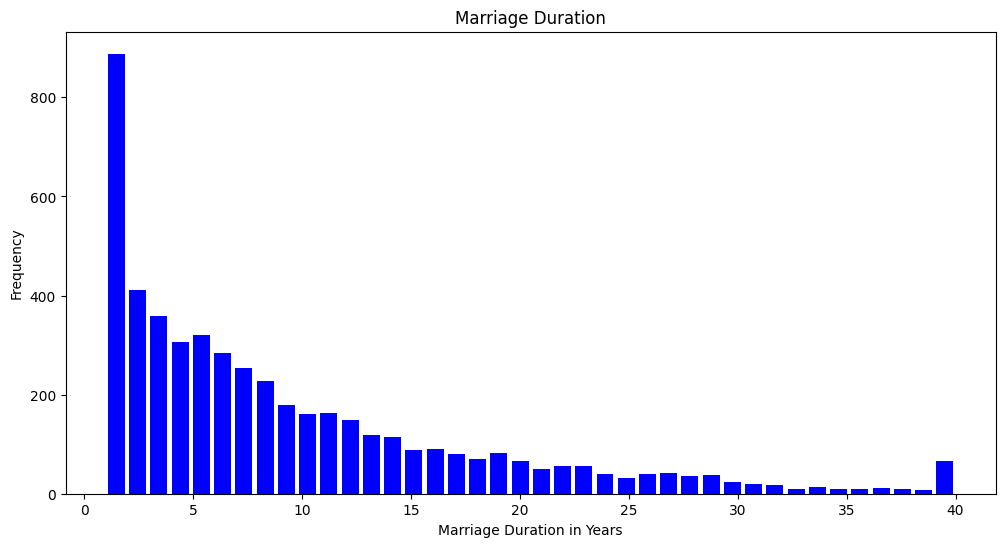

In [13]:
plt.figure(figsize=(12,6))
plt.hist(df['marriage_duration_years'],bins=40,color='blue',rwidth=0.8,linewidth=0.8)
plt.xlabel('Marriage Duration in Years')
plt.ylabel('Frequency')
plt.title('Marriage Duration')
plt.show()

# **Number of Children**

In [14]:
df['num_children'].describe()


,num_children
count,5000.000000
mean,1.552800
std,1.247527
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


In [15]:
df['num_children'].value_counts()


,count
num_children,
1,1626
2,1285
0,1069
3,652
4,255
5,86
6,27


/tmp/ipython-input-2133613431.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num_children',palette="mako")


<Axes: xlabel='num_children', ylabel='count'>

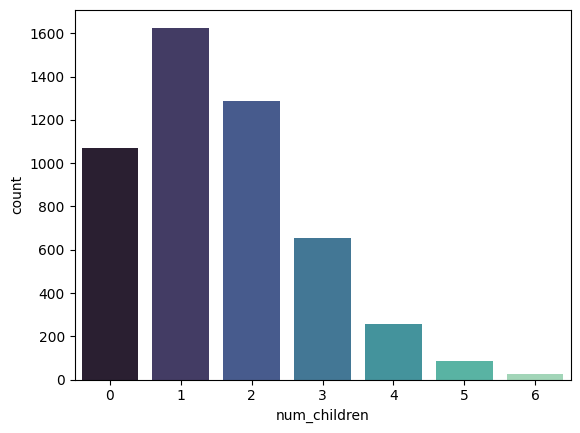

In [16]:
sns.countplot(data=df, x='num_children',palette="mako")


# **Education Level**

In [17]:
df['education_level'].value_counts()


,count
education_level,
Bachelor,2069
High School,1513
Master,963
No Formal Education,231
PhD,224


/tmp/ipython-input-1150378610.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='education_level',palette="Set2")


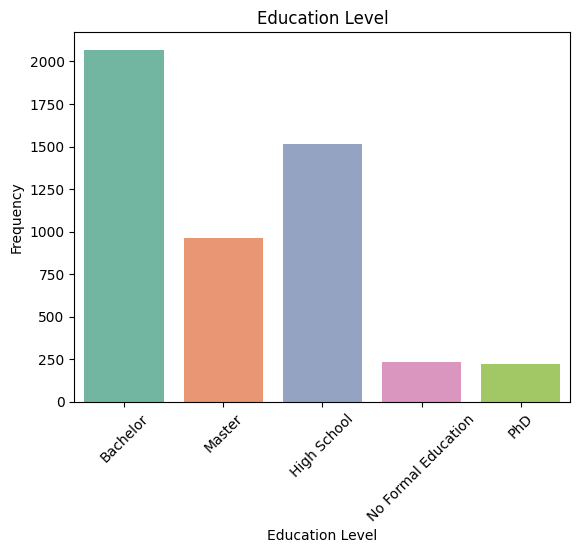

In [18]:
sns.countplot(data=df, x='education_level',palette="Set2")
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Education Level')
plt.xticks(rotation=45)
plt.show()

# **Employment Status**

In [19]:
df['employment_status'].value_counts()

,count
employment_status,
Full-time,2487
Part-time,1028
Homemaker,748
Unemployed,737


/tmp/ipython-input-3516266158.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='employment_status',palette="Set2")


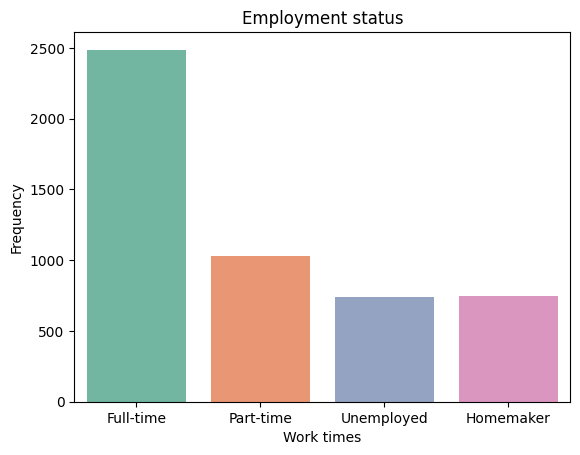

In [20]:
sns.countplot(data=df, x='employment_status',palette="Set2")
plt.xlabel('Work times')
plt.ylabel('Frequency')
plt.title('Employment status')
plt.show()

# **Combined income**

In [21]:
df['combined_income'].describe()


,combined_income
count,5000.000000
mean,60220.078400
std,19662.080982
min,10000.000000
25%,46666.000000
50%,60196.000000
75%,73666.500000
max,126909.000000


/tmp/ipython-input-1260508366.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['combined_income'], fill=True, palette="Set2")


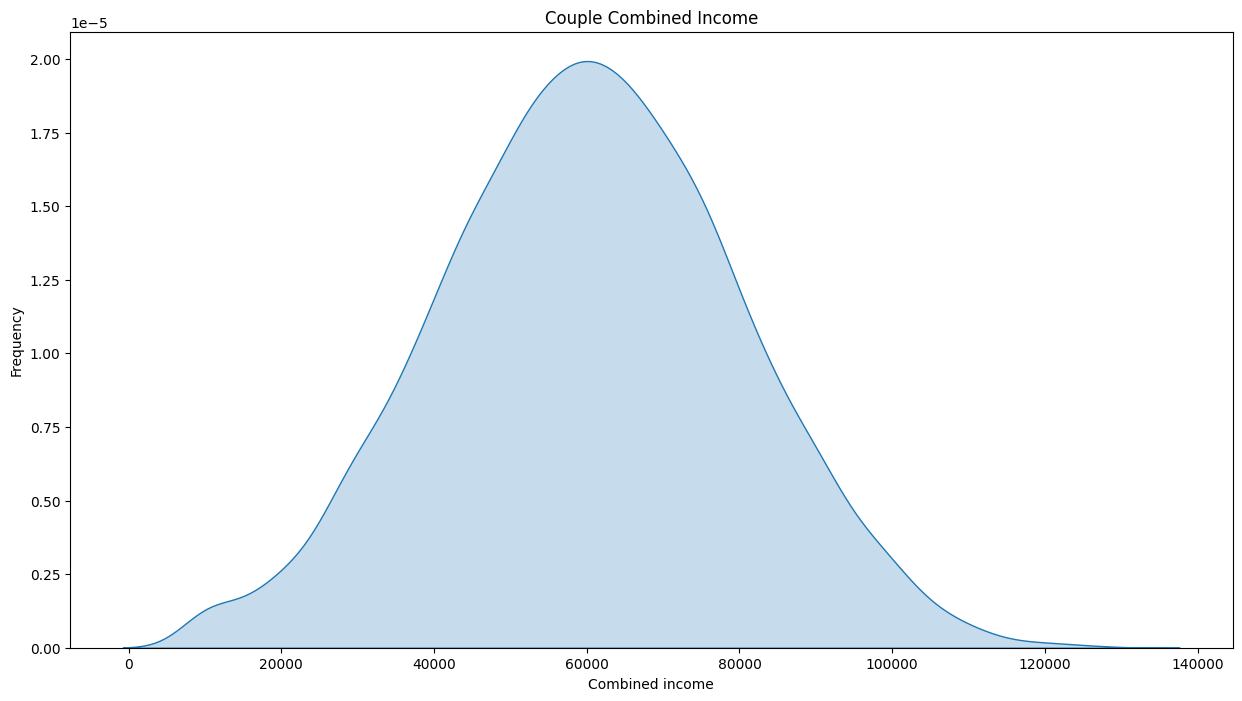

In [22]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['combined_income'], fill=True, palette="Set2")
plt.title('Couple Combined Income')
plt.xlabel('Combined income')
plt.ylabel('Frequency')

plt.show()

# **Religious Compatibility**

In [23]:
df['religious_compatibility'].value_counts()

,count
religious_compatibility,
Same Religion,3040
Not Religious,1003
Different Religion,957


/tmp/ipython-input-1298915507.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='religious_compatibility',palette="Set2")


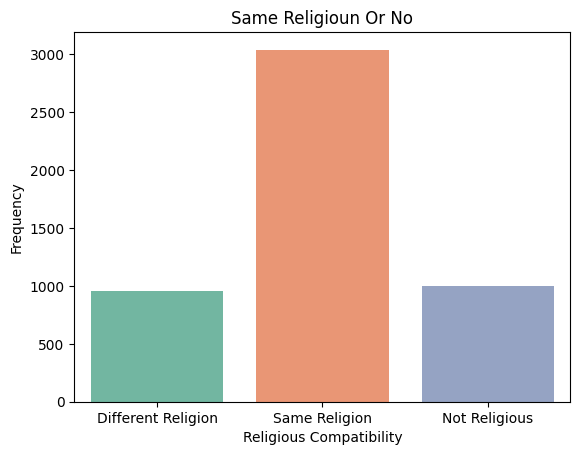

In [24]:
sns.countplot(data=df, x='religious_compatibility',palette="Set2")
plt.xlabel('Religious Compatibility')
plt.ylabel('Frequency')
plt.title('Same Religioun Or No')
plt.show()

# **Cultural Background Match**

In [25]:
df['cultural_background_match'].value_counts()


,count
cultural_background_match,
1,3777
0,1223


/tmp/ipython-input-3545649353.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cultural_background_match',palette="Set2")


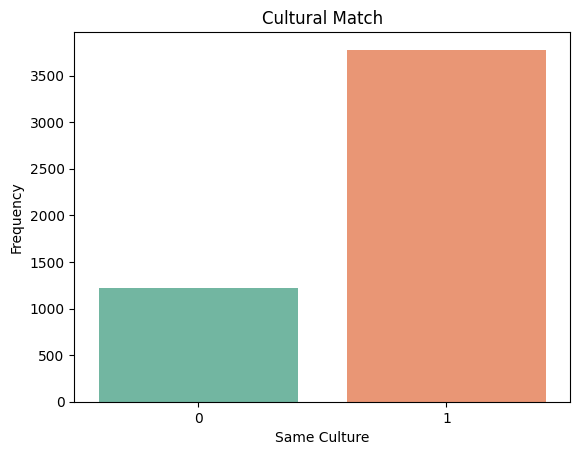

In [26]:
sns.countplot(data=df, x='cultural_background_match',palette="Set2")
plt.xlabel('Same Culture')
plt.ylabel('Frequency')
plt.title('Cultural Match')
plt.show()

# **Communication Score**

In [27]:
df['communication_score'].describe()

,communication_score
count,5000.000000
mean,6.040507
std,1.963349
min,1.000000
25%,4.661929
50%,6.058246
75%,7.426862
max,10.000000


In [28]:
df["communication_score"].value_counts()

,count
communication_score,
10.000000,112
1.000000,37
5.059562,1
5.761950,1
9.181754,1
...,...
6.650102,1
5.315281,1
3.881445,1


/tmp/ipython-input-4221733809.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['communication_score'], fill=True, palette="Set2")


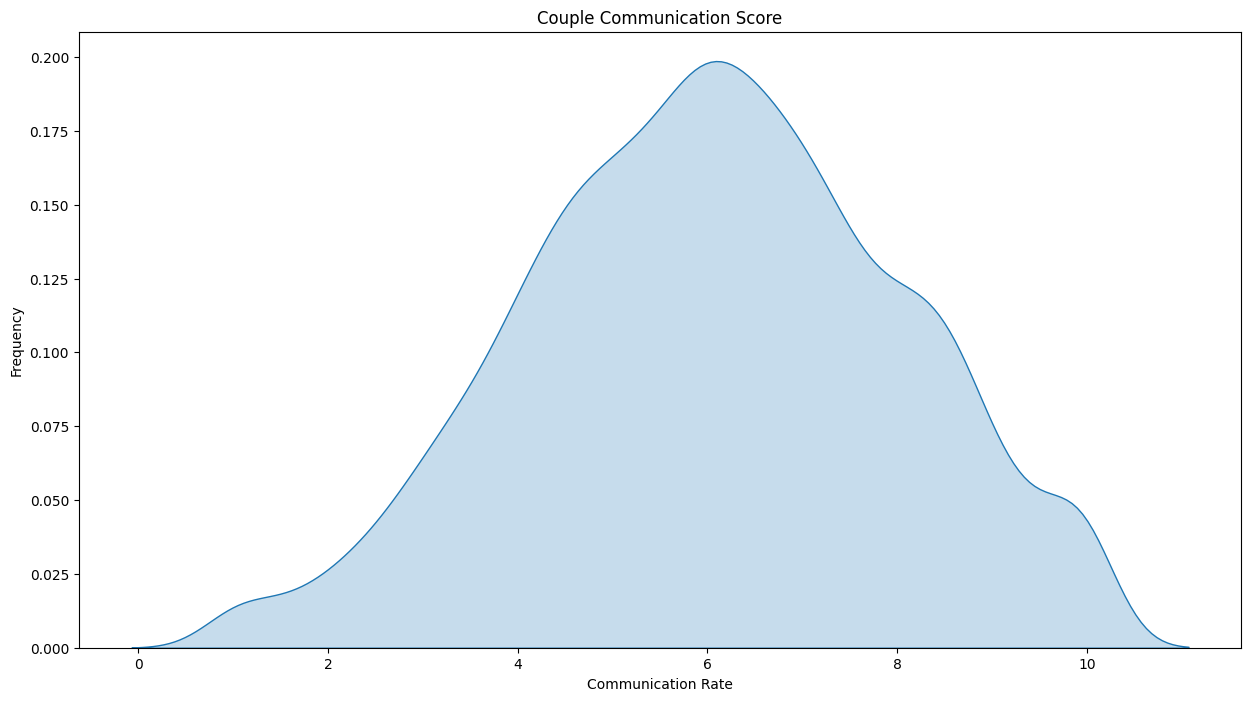

In [29]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['communication_score'], fill=True, palette="Set2")
plt.title('Couple Communication Score')
plt.xlabel('Communication Rate')
plt.ylabel('Frequency')

plt.show()

# **Conflict Frequency**

In [30]:
df['conflict_frequency'].value_counts()

,count
conflict_frequency,
1,1347
2,1344
3,939
0,668
4,439
5,174
6,67
7,18
9,2


/tmp/ipython-input-2703728456.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='conflict_frequency',palette="Set2")


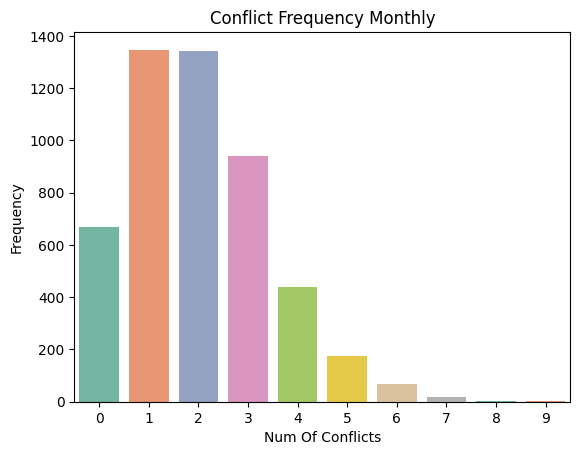

In [31]:
sns.countplot(data=df, x='conflict_frequency',palette="Set2")
plt.xlabel('Num Of Conflicts')
plt.ylabel('Frequency')
plt.title('Conflict Frequency Monthly')
plt.show()

# **Conflict Resolution Style**

In [32]:
df['conflict_resolution_style'].value_counts()

,count
conflict_resolution_style,
Collaborative,2028
Avoidant,1250
Aggressive,994
Passive,728


/tmp/ipython-input-3217845307.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='conflict_resolution_style',palette="Set2")


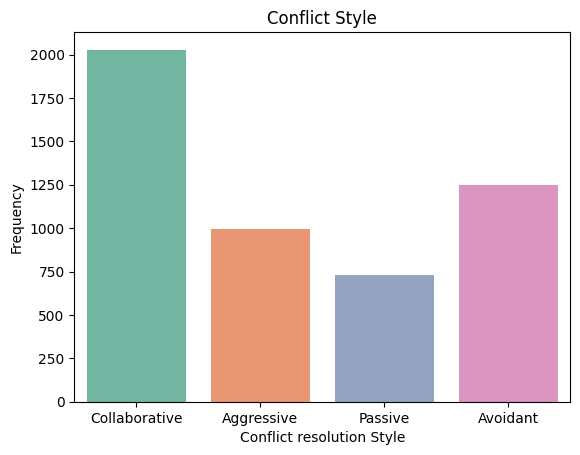

In [33]:
sns.countplot(data=df, x='conflict_resolution_style',palette="Set2")
plt.xlabel('Conflict resolution Style')
plt.ylabel('Frequency')
plt.title('Conflict Style')
plt.show()

# **financial_stress_level**

In [34]:
df['financial_stress_level'].describe()


,financial_stress_level
count,5000.000000
mean,5.071450
std,2.326322
min,1.000000
25%,3.365562
50%,5.062464
75%,6.717954
max,10.000000


/tmp/ipython-input-569368434.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['financial_stress_level'], fill=True, palette="Set2")


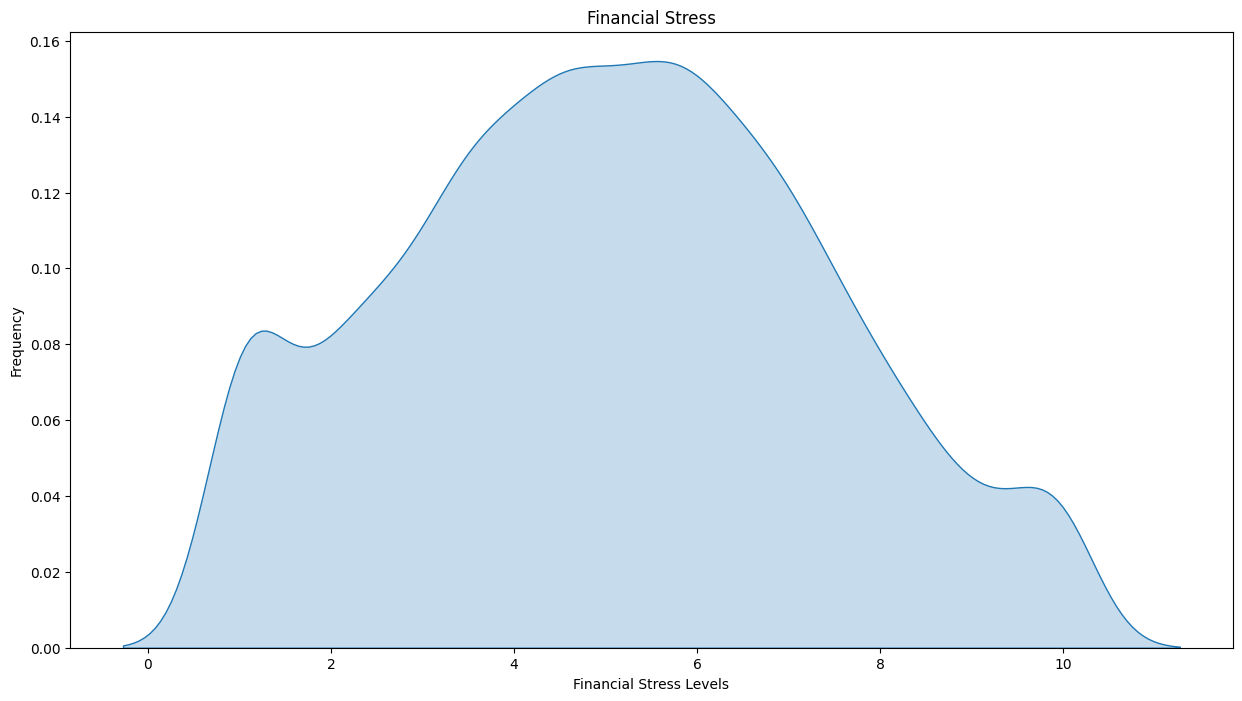

In [35]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['financial_stress_level'], fill=True, palette="Set2")
plt.title('Financial Stress')
plt.xlabel('Financial Stress Levels')
plt.ylabel('Frequency')

plt.show()

# **mental_health_issues**

In [36]:
df['mental_health_issues'].value_counts()

,count
mental_health_issues,
0,3981
1,1019


/tmp/ipython-input-1436892009.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='mental_health_issues',palette="Set2")


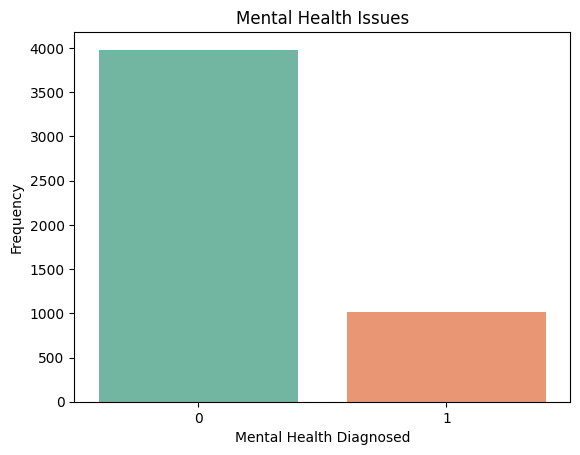

In [37]:
sns.countplot(data=df, x='mental_health_issues',palette="Set2")
plt.xlabel('Mental Health Diagnosed')
plt.ylabel('Frequency')
plt.title('Mental Health Issues')
plt.show()

# **INFIDELITY OCCURRED**

In [38]:
df['infidelity_occurred'].value_counts()


,count
infidelity_occurred,
0,4255
1,745


/tmp/ipython-input-3760278281.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='infidelity_occurred',palette="Set2")


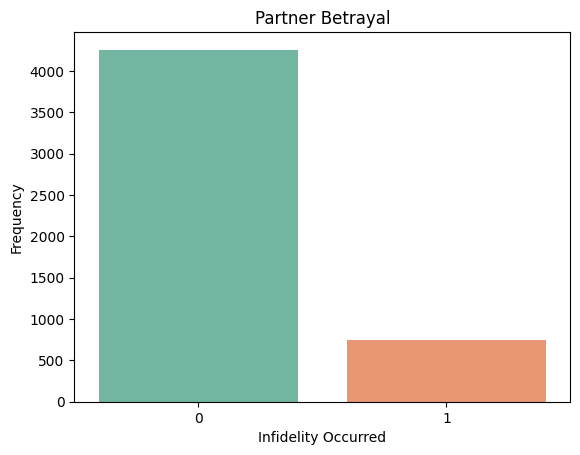

In [39]:
sns.countplot(data=df, x='infidelity_occurred',palette="Set2")
plt.xlabel('Infidelity Occurred')
plt.ylabel('Frequency')
plt.title('Partner Betrayal')
plt.show()

# **Counseling Attended**

In [40]:
df['counseling_attended'].value_counts()

,count
counseling_attended,
0,3798
1,1202


/tmp/ipython-input-3437127493.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='counseling_attended',palette="Set2")


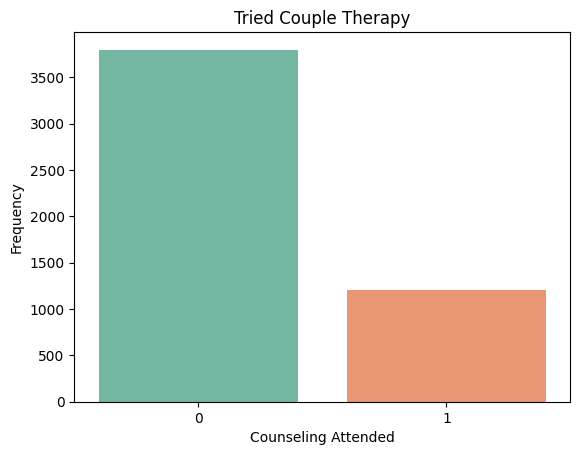

In [41]:
sns.countplot(data=df, x='counseling_attended',palette="Set2")
plt.xlabel('Counseling Attended')
plt.ylabel('Frequency')
plt.title('Tried Couple Therapy')
plt.show()

# **Social Support**

In [42]:
df['social_support'].describe()

,social_support
count,5000.000000
mean,5.966853
std,1.965504
min,1.000000
25%,4.597007
50%,6.010716
75%,7.328916
max,10.000000


/tmp/ipython-input-861898116.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['social_support'], fill=True, palette="Set2")


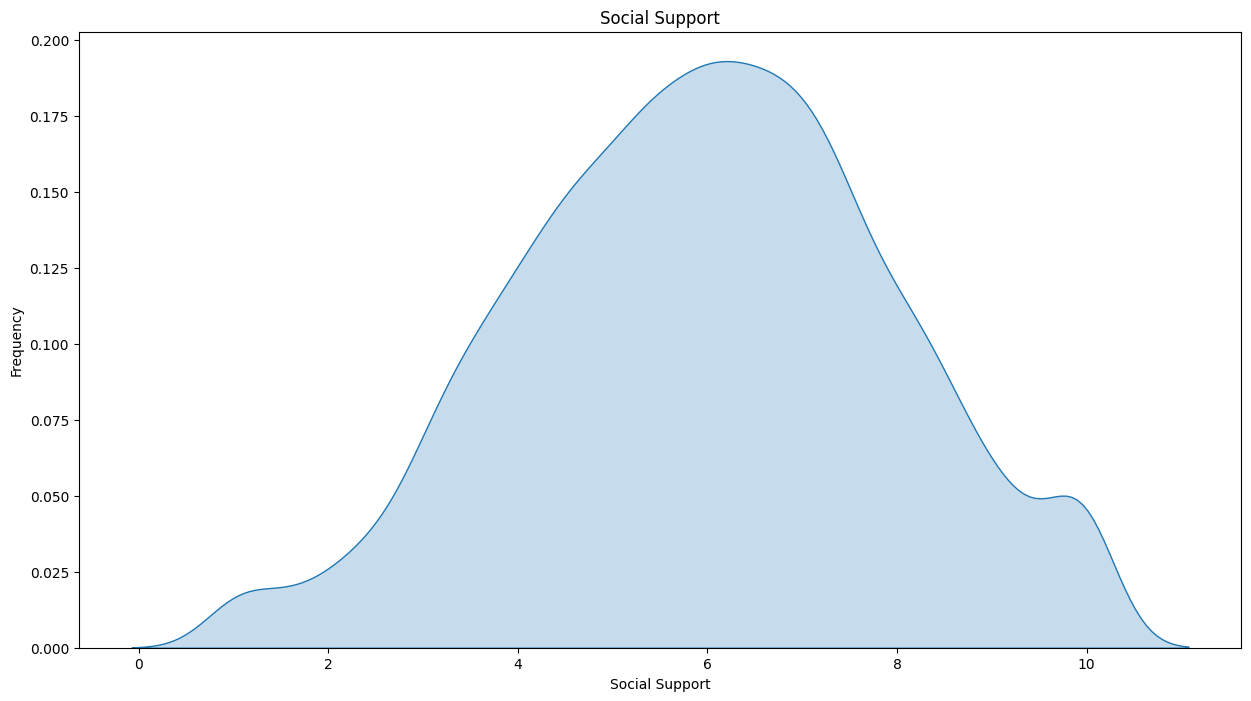

In [43]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['social_support'], fill=True, palette="Set2")
plt.title('Social Support')
plt.xlabel('Social Support')
plt.ylabel('Frequency')

plt.show()

# **Shared Hobies**

In [44]:
df['shared_hobbies_count'].value_counts()

,count
shared_hobbies_count,
2,1099
3,1082
4,878
1,781
5,523
0,255
6,237
7,89
8,42


/tmp/ipython-input-2163934901.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='shared_hobbies_count',palette="Set2")


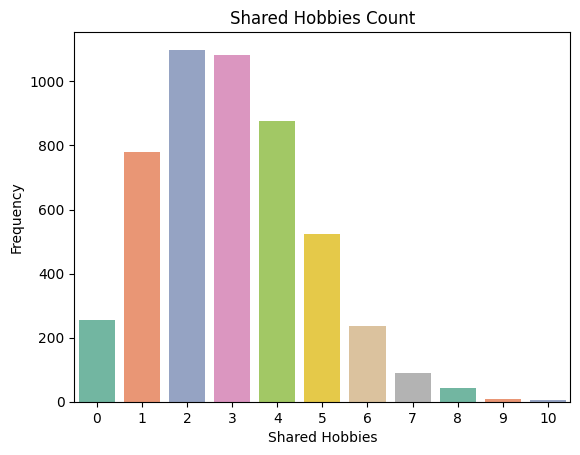

In [45]:
sns.countplot(data=df, x='shared_hobbies_count',palette="Set2")
plt.xlabel('Shared Hobbies')
plt.ylabel('Frequency')
plt.title('Shared Hobbies Count')
plt.show()

# **marriage_type**

In [46]:
df['marriage_type'].value_counts()


,count
marriage_type,
Love,3513
Arranged,1231
Other,256


/tmp/ipython-input-1369553199.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='marriage_type',palette="Set2")


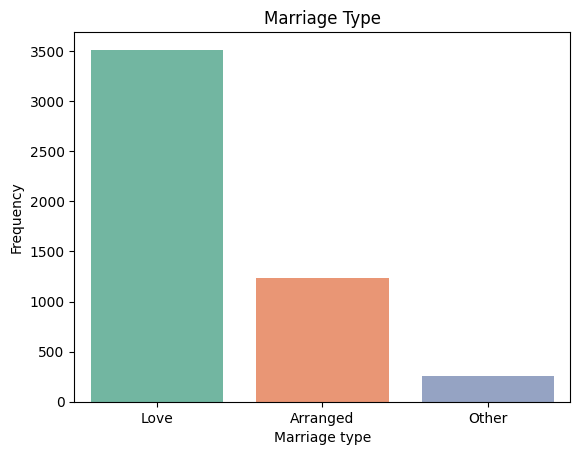

In [47]:
sns.countplot(data=df, x='marriage_type',palette="Set2")
plt.xlabel('Marriage type')
plt.ylabel('Frequency')
plt.title('Marriage Type')
plt.show()

# **pre_marital_cohabitation**

In [48]:
df['pre_marital_cohabitation'].value_counts()


,count
pre_marital_cohabitation,
1,2961
0,2039


/tmp/ipython-input-3095885417.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pre_marital_cohabitation',palette="Set2")


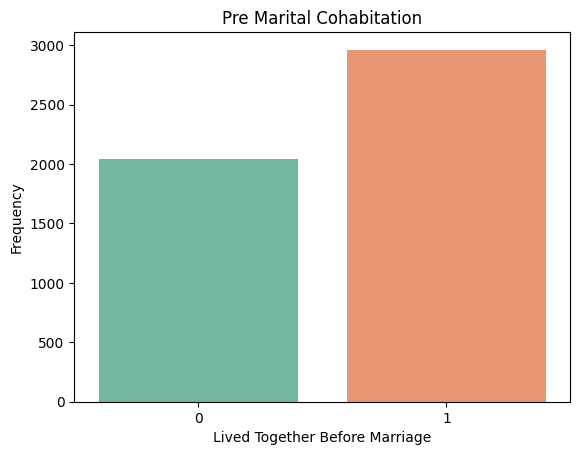

In [49]:
sns.countplot(data=df, x='pre_marital_cohabitation',palette="Set2")
plt.xlabel('Lived Together Before Marriage')
plt.ylabel('Frequency')
plt.title('Pre Marital Cohabitation')
plt.show()

# **domestic_violence_history**

In [50]:
df['domestic_violence_history'].value_counts()


,count
domestic_violence_history,
0,4748
1,252


/tmp/ipython-input-136308511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='domestic_violence_history',palette="Set2")


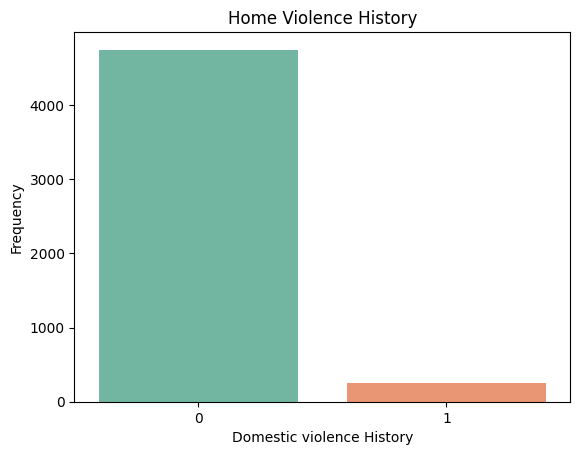

In [51]:
sns.countplot(data=df, x='domestic_violence_history',palette="Set2")
plt.xlabel('Domestic violence History')
plt.ylabel('Frequency')
plt.title('Home Violence History')
plt.show()

# **trust_score**

In [52]:
df['trust_score'].describe()


,trust_score
count,5000.000000
mean,6.030525
std,1.932922
min,1.000000
25%,4.702663
50%,6.034343
75%,7.372830
max,10.000000


(array([0.02044444, 0.036     , 0.07422222, 0.12755556, 0.18066667,
        0.20066667, 0.18      , 0.13444444, 0.08466667, 0.07244444]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

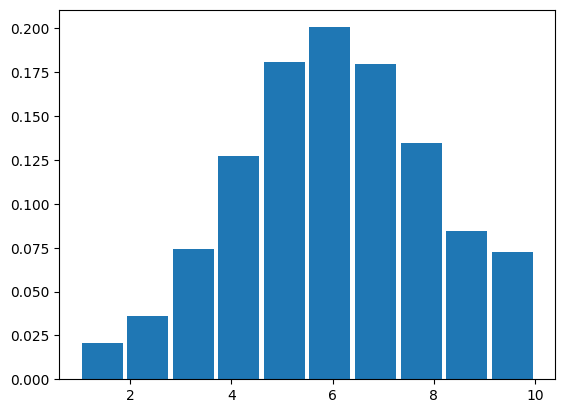

In [53]:
plt.hist(data=df, x='trust_score', density=True,bins=10,rwidth=0.9,linewidth=20)

# **Divorced**

In [54]:
df['divorced'].value_counts()


,count
divorced,
0,3009
1,1991


/tmp/ipython-input-2256627363.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='divorced',palette="Set2")


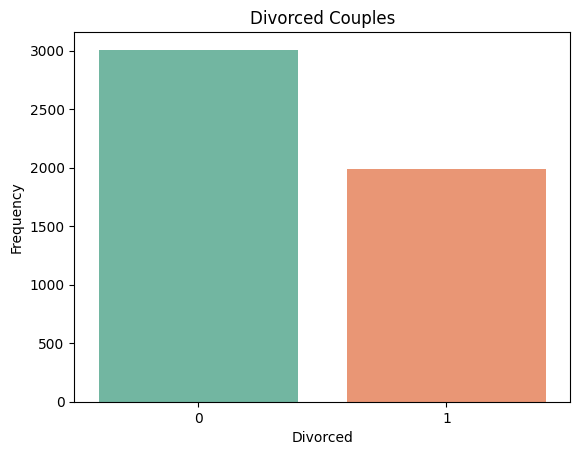

In [55]:
sns.countplot(data=df, x='divorced',palette="Set2")
plt.title('Divorced Couples')
plt.xlabel('Divorced')
plt.ylabel('Frequency')
plt.show()

# **Variables Analysis**

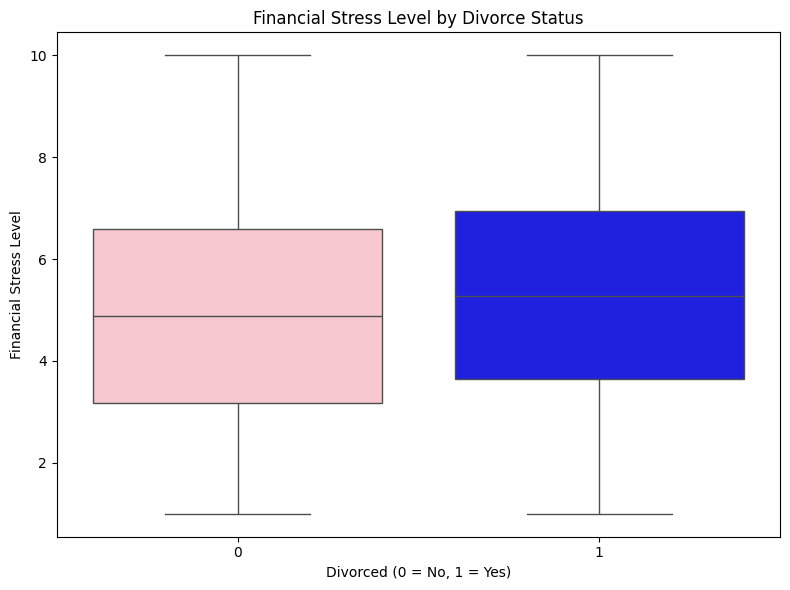

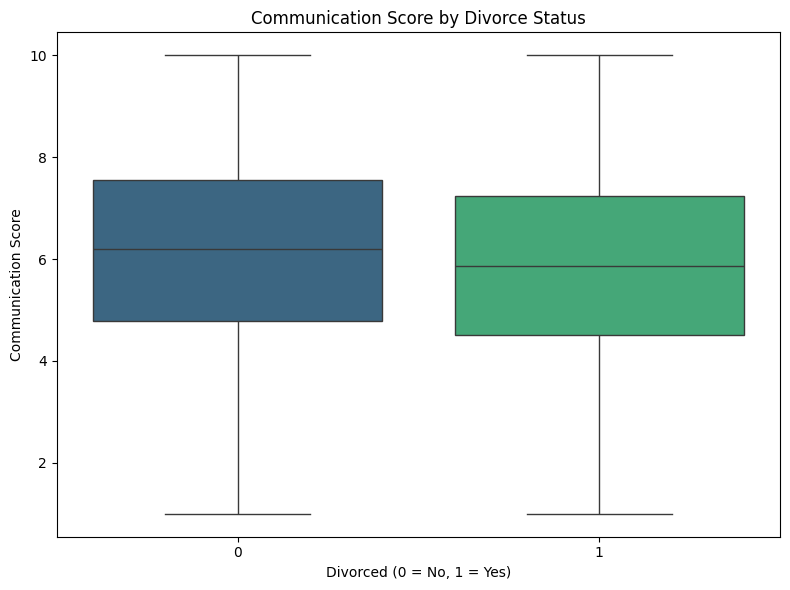

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Financial Stress Level by Divorce Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='divorced', y='financial_stress_level', hue='divorced', palette=['pink', 'blue'], legend=False)
plt.title('Financial Stress Level by Divorce Status')
plt.xlabel('Divorced (0 = No, 1 = Yes)')
plt.ylabel('Financial Stress Level')
plt.tight_layout()
plt.show()

# Plot 2: Communication Score by Divorce Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='divorced', y='communication_score', hue='divorced', palette='viridis', legend=False)
plt.title('Communication Score by Divorce Status')
plt.xlabel('Divorced (0 = No, 1 = Yes)')
plt.ylabel('Communication Score')
plt.tight_layout()
plt.show()

In [56]:
df.describe()

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,communication_score,conflict_frequency,financial_stress_level,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,27.583600,9.171000,1.552800,60220.078400,0.755400,6.040507,2.008000,5.071450,0.203800,0.149000,0.240400,5.966853,2.972600,0.592200,0.050400,6.030525,0.398200
std,4.855978,8.848266,1.247527,19662.080982,0.429893,1.963349,1.412351,2.326322,0.402862,0.356124,0.427369,1.965504,1.711735,0.491475,0.218791,1.932922,0.489576
min,18.000000,1.000000,0.000000,10000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,24.000000,2.000000,1.000000,46666.000000,1.000000,4.661929,1.000000,3.365562,0.000000,0.000000,0.000000,4.597007,2.000000,0.000000,0.000000,4.702663,0.000000
50%,28.000000,6.000000,1.000000,60196.000000,1.000000,6.058246,2.000000,5.062464,0.000000,0.000000,0.000000,6.010716,3.000000,1.000000,0.000000,6.034343,0.000000
75%,31.000000,13.000000,2.000000,73666.500000,1.000000,7.426862,3.000000,6.717954,0.000000,0.000000,0.000000,7.328916,4.000000,1.000000,0.000000,7.372830,1.000000
max,45.000000,40.000000,6.000000,126909.000000,1.000000,10.000000,9.000000,10.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,10.000000,1.000000


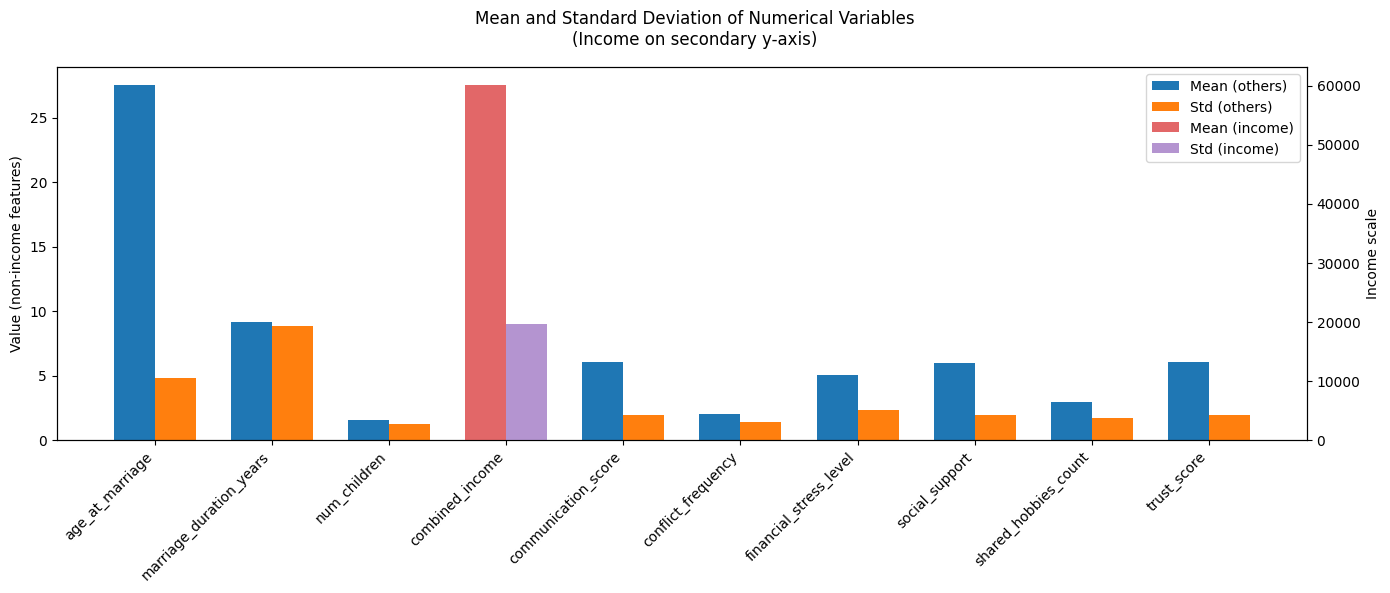

In [57]:
# Select numerical columns EXCLUDING binary variables (0/1)
numeric_cols = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if df[col].nunique() > 2
]
# Compute means and stds
means = df[numeric_cols].mean()
stds  = df[numeric_cols].std()

# Column that has a very different scale
income_col = "combined_income"

# X positions
numeric_cols = list(numeric_cols)
x = np.arange(len(numeric_cols))
width = 0.35

# --- Axis 1: all variables EXCEPT income ---
fig, ax1 = plt.subplots(figsize=(14, 6))

means_others = means.copy()
stds_others  = stds.copy()

# Remove income from axis 1 by setting to NaN
means_others[income_col] = np.nan
stds_others[income_col]  = np.nan

bars_mean_others = ax1.bar(x - width/2, means_others, width,
                           label="Mean (others)")
bars_std_others  = ax1.bar(x + width/2, stds_others, width,
                           label="Std (others)")

ax1.set_ylabel("Value (non-income features)")
ax1.set_xticks(x)
ax1.set_xticklabels(numeric_cols, rotation=45, ha="right")

# --- Axis 2: income only (secondary y-axis) ---
ax2 = ax1.twinx()  # shares the same x-axis

income_idx = numeric_cols.index(income_col)

bars_mean_income = ax2.bar(income_idx - width/2, means[income_col], width,
                           color="tab:red", alpha=0.7, label="Mean (income)")
bars_std_income  = ax2.bar(income_idx + width/2, stds[income_col], width,
                           color="tab:purple", alpha=0.7, label="Std (income)")

ax2.set_ylabel("Income scale")

# --- Title & legend ---
fig.suptitle("Mean and Standard Deviation of Numerical Variables\n"
             "(Income on secondary y-axis)")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

plt.tight_layout()
plt.show()


In [58]:
# Categorical (object) columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Binary columns (numerical but only 0/1)
binary_cols = [col for col in df.columns
               if df[col].nunique() == 2 and df[col].dtype != "object"]

# Combine them
all_cat_cols = categorical_cols + binary_cols

# Compute modes
modes = {col: df[col].mode()[0] for col in all_cat_cols}

modes


{'education_level': 'Bachelor',
 'employment_status': 'Full-time',
 'religious_compatibility': 'Same Religion',
 'conflict_resolution_style': 'Collaborative',
 'marriage_type': 'Love',
 'cultural_background_match': np.int64(1),
 'mental_health_issues': np.int64(0),
 'infidelity_occurred': np.int64(0),
 'counseling_attended': np.int64(0),
 'pre_marital_cohabitation': np.int64(1),
 'domestic_violence_history': np.int64(0),
 'divorced': np.int64(0)}

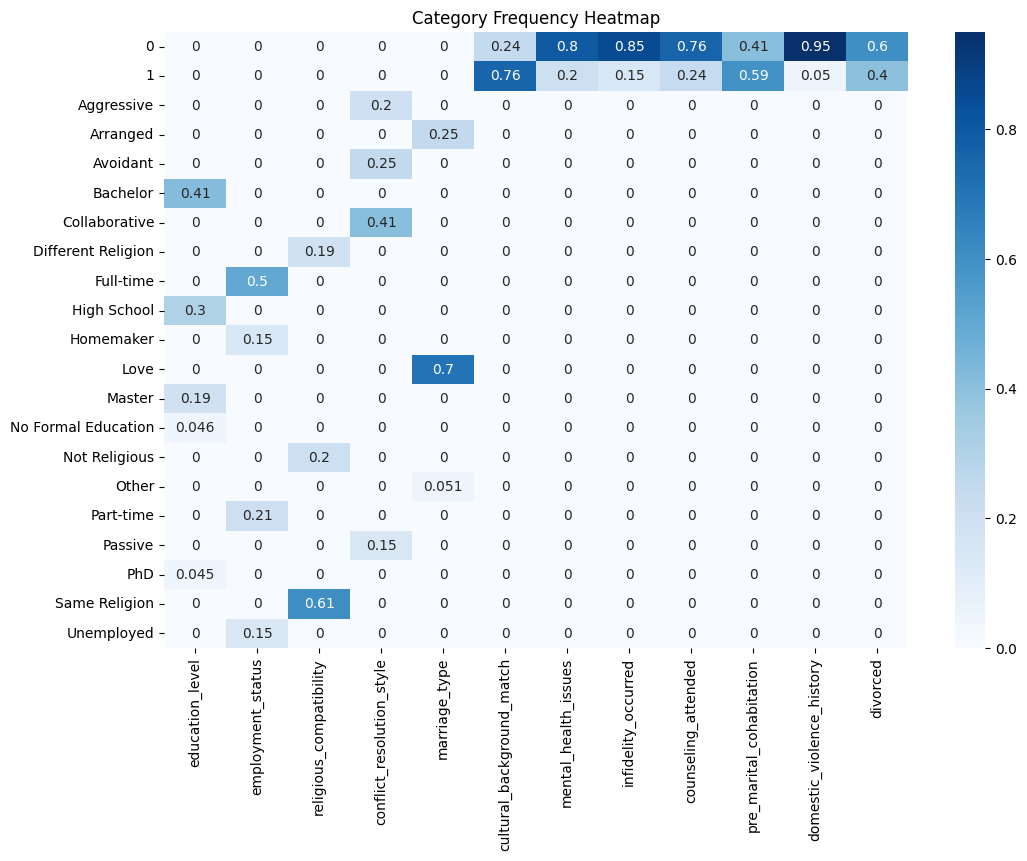

In [59]:
import seaborn as sns
import pandas as pd

freq_table = pd.DataFrame({
    col: df[col].value_counts(normalize=True).rename(index=str) # Convert index to string
    for col in all_cat_cols
}).fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(freq_table, annot=True, cmap="Blues")
plt.title("Category Frequency Heatmap")
plt.show()


# **PCA implementation**

In [60]:
from sklearn.decomposition import PCA

#Fit PCA keeping all components initially ---
temp_pca = PCA()          # n_components=None by default
X_temp_pca = temp_pca.fit_transform(X_scaled)

# Explained variance ratio for each component
evr = temp_pca.explained_variance_ratio_

# Cumulative variance
cum_evr = np.cumsum(evr)

print("Explained variance ratio:", evr)
print("Cumulative variance:", cum_evr)

Explained variance ratio: [0.05497137 0.05024586 0.046117   0.0447953  0.04141793 0.04128726
 0.03942209 0.03757501 0.0371092  0.03575874 0.03543125 0.03495077
 0.03461392 0.03406255 0.03375906 0.03306422 0.03290991 0.03280746
 0.03249005 0.03223093 0.03172802 0.03124889 0.03090811 0.03061368
 0.03015679 0.02117501 0.01980365 0.01743963 0.01241752 0.00948881]
Cumulative variance: [0.05497137 0.10521724 0.15133423 0.19612953 0.23754747 0.27883472
 0.31825682 0.35583182 0.39294102 0.42869976 0.46413101 0.49908178
 0.5336957  0.56775825 0.60151731 0.63458153 0.66749144 0.7002989
 0.73278895 0.76501989 0.79674791 0.8279968  0.85890491 0.88951859
 0.91967538 0.94085039 0.96065404 0.97809367 0.99051119 1.        ]


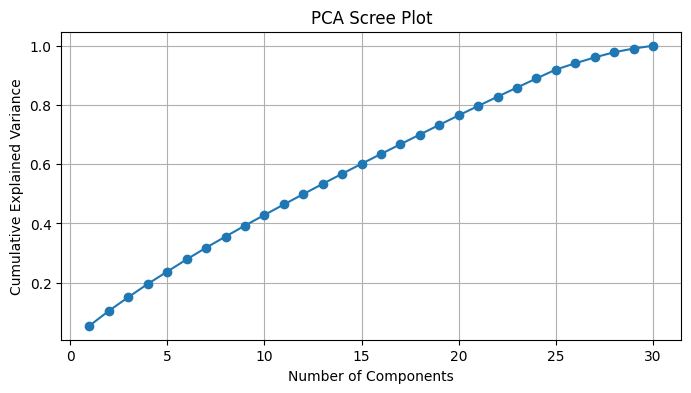

In [61]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(evr) + 1), cum_evr, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.grid(True)
plt.show()

In [62]:
pca = PCA(n_components=23)
X_pca = pca.fit_transform(X_scaled)


In [63]:
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns
)

loadings


,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,communication_score,conflict_frequency,financial_stress_level,mental_health_issues,infidelity_occurred,...,employment_status_Homemaker,employment_status_Part-time,employment_status_Unemployed,conflict_resolution_style_Avoidant,conflict_resolution_style_Collaborative,conflict_resolution_style_Passive,marriage_type_Love,marriage_type_Other,religious_compatibility_Not Religious,religious_compatibility_Same Religion
0,-0.024104,-0.087707,0.033654,-0.006146,0.003178,0.021506,0.062277,-0.040660,0.000767,-0.040729,...,0.026640,-0.035078,0.010777,0.012810,-0.037700,0.034312,-0.075931,0.087880,-0.686691,0.690954
1,0.023854,-0.014246,0.030379,-0.010210,-0.005722,-0.054092,0.013869,0.018321,0.058484,-0.007826,...,-0.058690,-0.043855,0.081738,-0.605411,0.738226,-0.218481,0.033454,-0.073264,-0.045852,0.034034
2,0.012467,-0.094368,-0.020358,-0.098046,-0.006878,0.000763,-0.059821,-0.052670,0.029626,0.037802,...,-0.034657,0.082332,-0.066555,0.031854,-0.061027,0.066486,0.612150,-0.602743,-0.088572,0.081229
3,-0.005613,-0.029288,0.015867,-0.001282,0.082851,-0.015538,-0.026128,-0.047585,-0.068899,0.076402,...,-0.084169,0.205411,-0.138411,-0.098932,-0.026751,0.154272,-0.291976,0.301864,0.001762,-0.011978
4,-0.009751,0.025126,-0.023048,-0.046289,0.139150,0.021482,-0.020433,-0.163175,0.065325,0.030435,...,0.075283,0.181215,-0.250932,-0.477120,-0.109507,0.700585,0.036175,-0.001109,0.027944,-0.011357
5,-0.125296,0.008746,0.001836,0.057406,-0.004243,0.078363,-0.084562,0.071045,0.017959,0.112643,...,-0.461167,0.699060,-0.283749,0.103201,0.075104,-0.213498,0.047102,-0.002298,-0.042978,0.031586
6,0.075952,0.029956,-0.093355,0.023590,-0.053195,-0.089490,-0.086102,-0.044975,-0.011281,0.079652,...,-0.612154,-0.048549,0.671459,-0.087354,-0.134195,0.245514,0.000500,0.014066,-0.027069,0.018095
7,-0.020906,0.152942,-0.313890,0.054876,-0.128589,-0.090405,-0.162906,-0.057096,-0.255604,0.114614,...,0.052427,-0.056501,-0.078389,-0.056445,0.007757,0.045604,0.062137,0.012173,0.012636,0.007123
8,0.115953,-0.086324,-0.146905,0.221212,-0.145893,0.281541,-0.166076,0.140972,0.272854,0.249240,...,0.131823,-0.118877,-0.031350,-0.024042,-0.045899,0.101728,0.046484,-0.062726,-0.024104,0.016674
9,-0.402984,0.182409,0.263575,-0.194004,-0.113499,-0.265194,0.035468,0.246362,-0.126340,0.166554,...,0.066370,-0.031878,-0.059547,-0.039324,-0.037903,0.148460,0.068772,-0.021671,-0.043201,0.022068


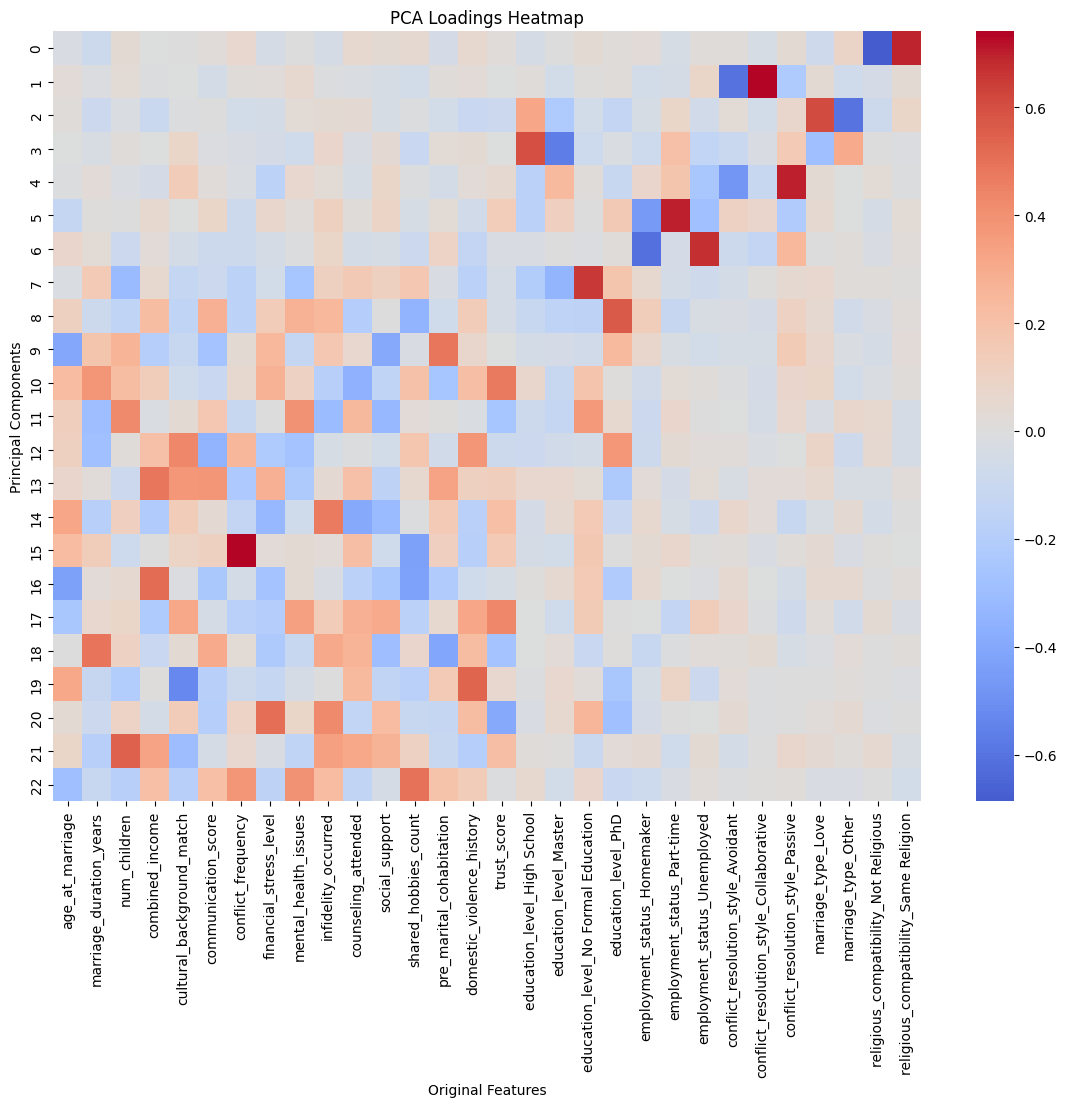

In [64]:
plt.figure(figsize=(14, 10))
sns.heatmap(loadings, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

In [65]:
def top_loadings(loadings, pc, n=5):
    component = loadings.iloc[pc]
    return component.abs().sort_values(ascending=False).head(n)

print("Top features contributing to PC1:")
print(top_loadings(loadings, 0))

print("\nTop features contributing to PC2:")
print(top_loadings(loadings, 1))

print("\nTop features contributing to PC3:")
print(top_loadings(loadings, 2))


Top features contributing to PC1:
religious_compatibility_Same Religion    0.690954
religious_compatibility_Not Religious    0.686691
marriage_type_Other                      0.087880
marriage_duration_years                  0.087707
marriage_type_Love                       0.075931
Name: 0, dtype: float64

Top features contributing to PC2:
conflict_resolution_style_Collaborative    0.738226
conflict_resolution_style_Avoidant         0.605411
conflict_resolution_style_Passive          0.218481
employment_status_Unemployed               0.081738
marriage_type_Other                        0.073264
Name: 1, dtype: float64

Top features contributing to PC3:
marriage_type_Love             0.612150
marriage_type_Other            0.602743
education_level_High School    0.318563
education_level_Master         0.222663
education_level_PhD            0.132349
Name: 2, dtype: float64


# **Creating the model**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# X_pca is what we created earlier (with n_components=23)
# y is your target variable

# 1) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# 2) Fit logistic regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# 3) Make predictions
y_pred = log_reg.predict(X_test)

# 4) Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.93      0.73       593
           1       0.56      0.14      0.22       407

    accuracy                           0.60      1000
   macro avg       0.58      0.53      0.48      1000
weighted avg       0.59      0.60      0.52      1000


Confusion Matrix:
[[549  44]
 [352  55]]


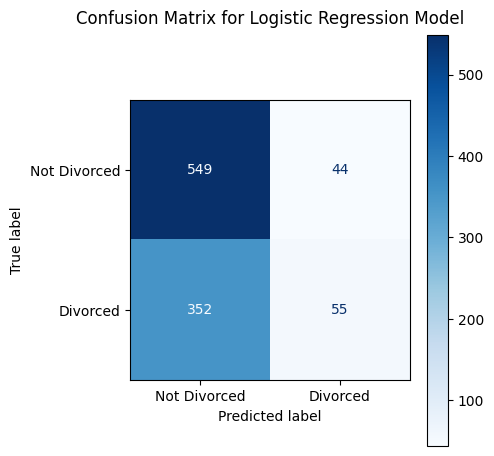

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Ensure 'cm' is defined before use
# Assuming y_test and y_pred are available from previous cells
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Divorced", "Divorced"])
disp.plot(ax=ax, cmap="Blues", values_format='d')

# Fix spacing so title doesn’t overlap with the plot
plt.title("Confusion Matrix for Logistic Regression Model", pad=55)

plt.tight_layout()
plt.show()

In [68]:
import pandas as pd

coeff_df = pd.DataFrame({
    "Component": [f"PC{i+1}" for i in range(pca.n_components_)],
    "Coefficient": log_reg.coef_[0]
})

coeff_df["Absolute_Impact"] = coeff_df["Coefficient"].abs()
coeff_df["Odds_Ratio"] = np.exp(coeff_df["Coefficient"])
coeff_df.sort_values(by="Absolute_Impact", ascending=False, inplace=True)

coeff_df


,Component,Coefficient,Absolute_Impact,Odds_Ratio
20,PC21,0.209617,0.209617,1.233206
8,PC9,0.118290,0.118290,1.125570
9,PC10,0.113281,0.113281,1.119947
18,PC19,0.089669,0.089669,1.093812
19,PC20,0.082140,0.082140,1.085608
12,PC13,0.077923,0.077923,1.081040
14,PC15,-0.067277,0.067277,0.934936
7,PC8,-0.058394,0.058394,0.943278
5,PC6,-0.054742,0.054742,0.946729
16,PC17,0.042754,0.042754,1.043681


In [69]:
def top_loadings_for_pc(loadings, pc_num, n=5):
    component = loadings.iloc[pc_num]
    return component.abs().sort_values(ascending=False).head(n)

print("PC21 dominant variables:")
print(top_loadings_for_pc(loadings, 20))

print("\nPC9 dominant variables:")
print(top_loadings_for_pc(loadings, 8))

print("\nPC10 dominant variables:")
print(top_loadings_for_pc(loadings, 9))


PC21 dominant variables:
financial_stress_level                 0.510991
infidelity_occurred                    0.425825
trust_score                            0.393879
education_level_PhD                    0.289452
education_level_No Formal Education    0.256588
Name: 20, dtype: float64

PC9 dominant variables:
education_level_PhD     0.569001
shared_hobbies_count    0.347705
communication_score     0.281541
mental_health_issues    0.272854
infidelity_occurred     0.249240
Name: 8, dtype: float64

PC10 dominant variables:
pre_marital_cohabitation    0.486167
age_at_marriage             0.402984
social_support              0.395877
communication_score         0.265194
num_children                0.263575
Name: 9, dtype: float64


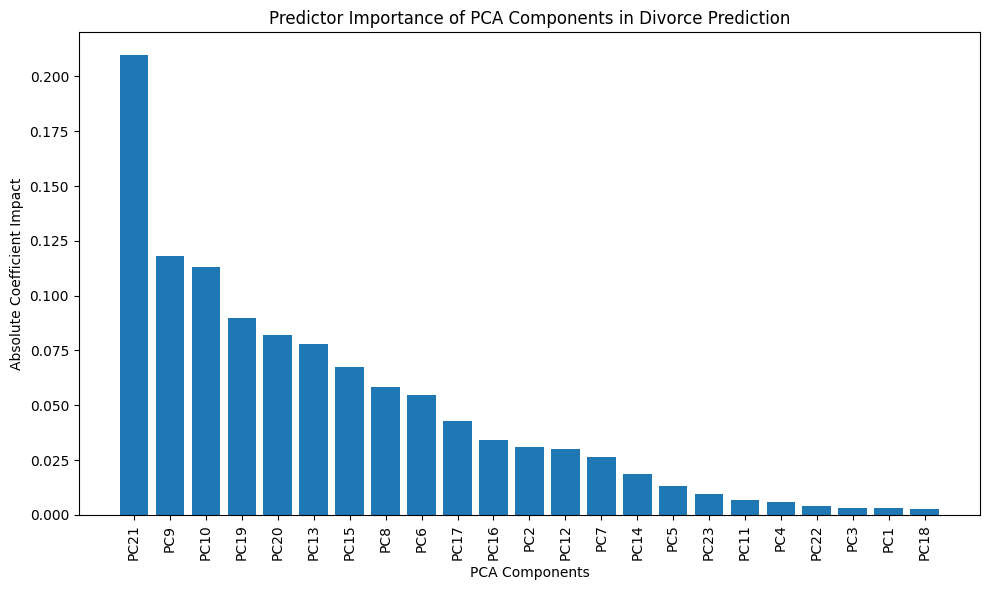

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Use your coefficient dataframe from earlier
coeff_df_sorted = coeff_df.sort_values(by="Absolute_Impact", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(coeff_df_sorted["Component"], coeff_df_sorted["Absolute_Impact"])
plt.xticks(rotation=90)
plt.xlabel("PCA Components")
plt.ylabel("Absolute Coefficient Impact")
plt.title("Predictor Importance of PCA Components in Divorce Prediction")
plt.tight_layout()
plt.show()


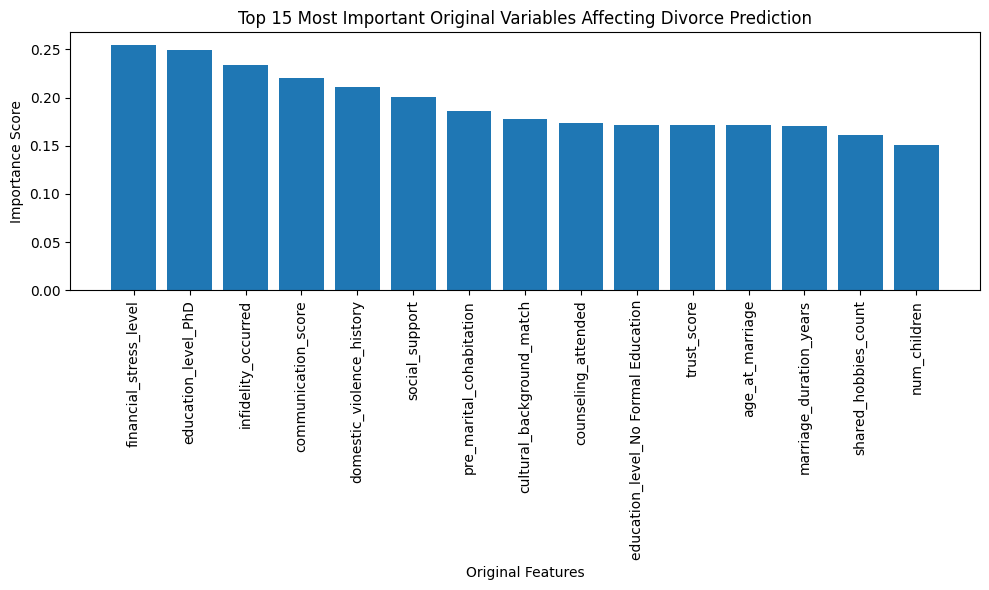

In [71]:
import pandas as pd

# Calculate contribution of each original feature
original_importance = pd.DataFrame(
    abs(log_reg.coef_[0][:, None] * pca.components_).sum(axis=0),
    index=X.columns,
    columns=["Importance"]
).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(original_importance.index[:15], original_importance["Importance"][:15])
plt.xticks(rotation=90)
plt.xlabel("Original Features")
plt.ylabel("Importance Score")
plt.title("Top 15 Most Important Original Variables Affecting Divorce Prediction")
plt.tight_layout()
plt.show()


Top 3 and Bottom 3 Features by Importance:


,Importance
financial_stress_level,0.254988
education_level_PhD,0.249744
infidelity_occurred,0.233566
marriage_type_Other,0.044707
religious_compatibility_Not Religious,0.029085
religious_compatibility_Same Religion,0.020116


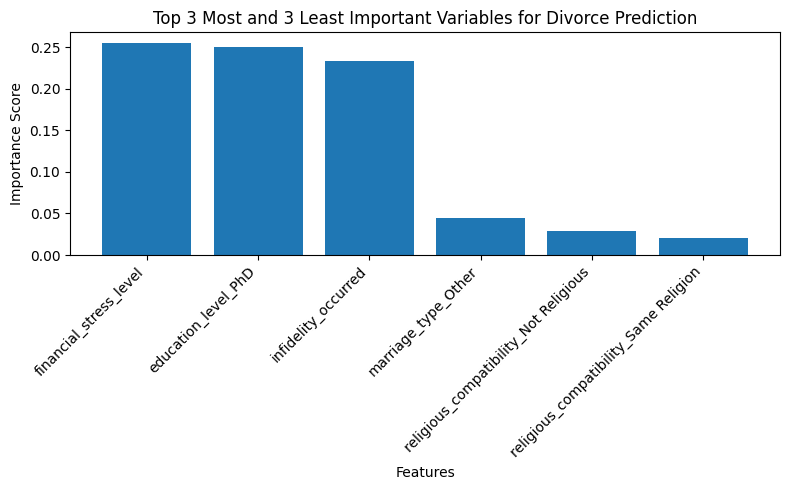

In [72]:
# Calculate contribution of each original feature
original_importance = pd.DataFrame(
    abs(log_reg.coef_[0][:, None] * pca.components_).sum(axis=0),
    index=X.columns,
    columns=["Importance"]
).sort_values(by="Importance", ascending=False)

# Select top 3 and bottom 3 features
top3 = original_importance.head(3)
bottom3 = original_importance.tail(3)

# Combine into a single table
combined_table = pd.concat([top3, bottom3])
print("Top 3 and Bottom 3 Features by Importance:")
display(combined_table)

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(combined_table.index, combined_table["Importance"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Top 3 Most and 3 Least Important Variables for Divorce Prediction")
plt.tight_layout()
plt.show()


**Try Model**

In [73]:
'''This represents:

A young couple

Low trust, high conflict

Strong financial stress

Avoidant conflict style

Low social support'''

sample = pd.DataFrame({
    'age_at_marriage': [28],
    'marriage_duration_years': [5],
    'num_children': [1],
    'combined_income': [45000],
    'cultural_background_match': [1],
    'communication_score': [4],
    'trust_score': [3],
    'conflict_frequency': [7],
    'financial_stress_level': [8],
    'mental_health_issues': [1],
    'infidelity_occurred': [0],
    'counseling_attended': [0],
    'social_support': [3],
    'shared_hobbies_count': [2],
    'pre_marital_cohabitation': [1],
    'domestic_violence_history': [0],
    'religious_compatibility': ['Different Religion'],
    'education_level': ['Bachelor'],
    'employment_status': ['Employed'],
    'conflict_resolution_style': ['Avoidant'],
    'marriage_type': ['Love']
})
# Encode categorical variables
sample_encoded = pd.get_dummies(sample)
sample_encoded = sample_encoded.reindex(columns=df_encoded.drop(columns=['divorced']).columns, fill_value=0)

# Scale
sample_scaled = scaler.transform(sample_encoded)

# Apply PCA
sample_pca = pca.transform(sample_scaled)

# Predict
pred = log_reg.predict(sample_pca)
prob = log_reg.predict_proba(sample_pca)
print("Predicted class:", pred[0])
print("Probability of NOT divorced:", prob[0][0])
print("Probability of divorced:", prob[0][1])


Predicted class: 1
Probability of NOT divorced: 0.4983588712990208
Probability of divorced: 0.5016411287009792


In [74]:
'''Financial stress = low
Infidelity = no
Trust = high
Communication = high
Shared activities = good
Mental health issues = none
Domestic violence = none
Employed
Same religion
Collaborative conflict style'''

sample_not_divorced = pd.DataFrame({
    'age_at_marriage': [30],
    'marriage_duration_years': [10],
    'num_children': [2],
    'combined_income': [85000],
    'cultural_background_match': [1],
    'communication_score': [8],
    'trust_score': [9],
    'conflict_frequency': [1],
    'financial_stress_level': [2],
    'mental_health_issues': [0],
    'infidelity_occurred': [0],
    'counseling_attended': [0],
    'social_support': [7],
    'shared_hobbies_count': [5],
    'pre_marital_cohabitation': [0],
    'domestic_violence_history': [0],
    'religious_compatibility': ['Same Religion'],
    'education_level': ['Bachelor'],
    'employment_status': ['Employed'],
    'conflict_resolution_style': ['Collaborative'],
    'marriage_type': ['Love']
})
# Encode
sample_encoded = pd.get_dummies(sample_not_divorced)
sample_encoded = sample_encoded.reindex(columns=X.columns, fill_value=0)

# Scale
sample_scaled = scaler.transform(sample_encoded)

# PCA
sample_pca = pca.transform(sample_scaled)

# Predict
pred = log_reg.predict(sample_pca)
prob = log_reg.predict_proba(sample_pca)

print("Predicted class:", pred[0])
print("Probability of NOT divorced:", prob[0][0])
print("Probability of divorced:", prob[0][1])


Predicted class: 0
Probability of NOT divorced: 0.725031531523952
Probability of divorced: 0.27496846847604794


# **Hypothesis Testing**

In [75]:
import statsmodels.api as sm

# Select only the variable needed for hypothesis testing.
# You may include controls later, but this tests ONLY financial stress.
X_hyp = df[['financial_stress_level']]
X_hyp = sm.add_constant(X_hyp)  # add intercept

y = df['divorced']

# Fit logistic regression with statsmodels
logit_model = sm.Logit(y, X_hyp)
result = logit_model.fit()

print(result.summary())

# Extract coefficient, p-value, and odds ratio
coef = result.params['financial_stress_level']
p_value = result.pvalues['financial_stress_level']
odds_ratio = np.exp(coef)

print("\nCoefficient:", coef)
print("P-value:", p_value)
print("Odds ratio:", odds_ratio)


Optimization terminated successfully.
         Current function value: 0.669790
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Dec 2025   Pseudo R-squ.:                0.003697
Time:                        22:25:52   Log-Likelihood:                -3348.9
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                 6.181e-07
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.7297      0.070    -10.374      0.000      -0.868      